<a href="https://colab.research.google.com/github/dipayandas97/Image-Processing/blob/master/Barcode_scanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2
import imutils
import numpy
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#Experiment

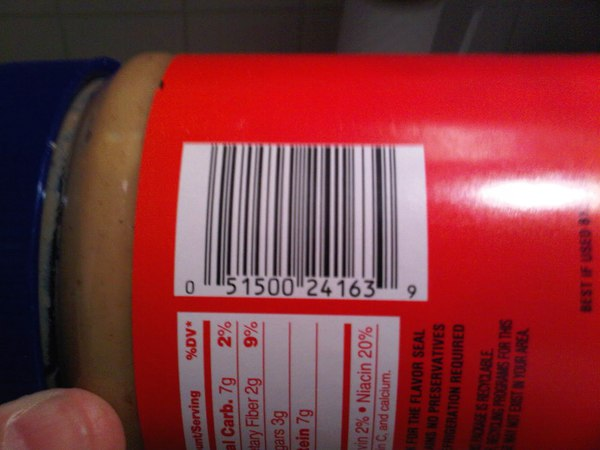

In [57]:
image = cv2.imread('/content/barcode_01.jpeg')
cv2_imshow(image)

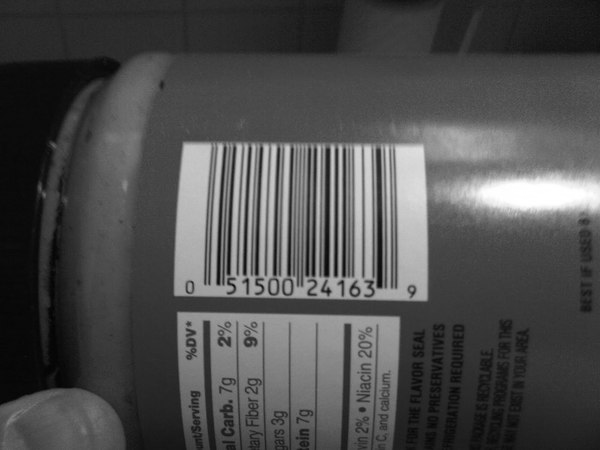

In [8]:
#convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

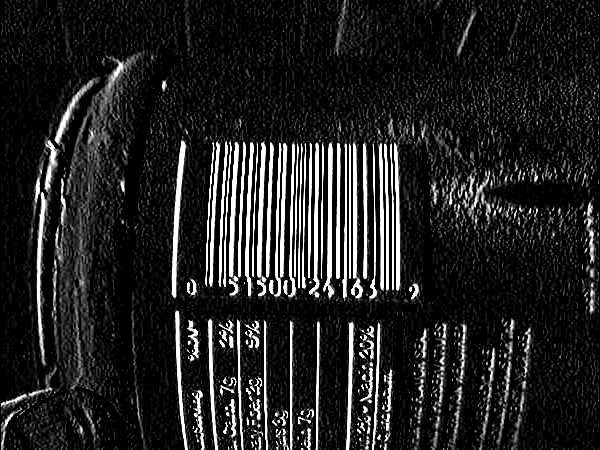

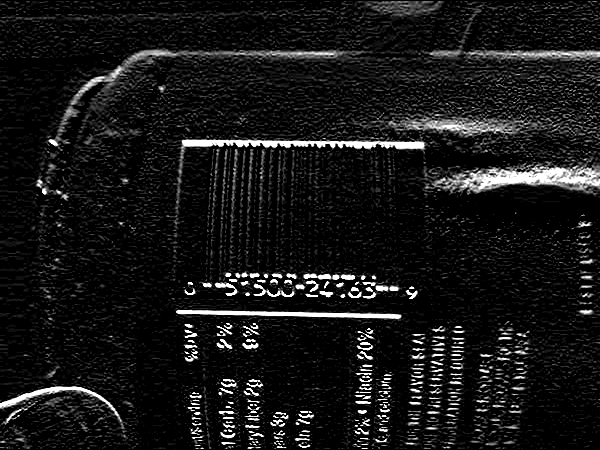

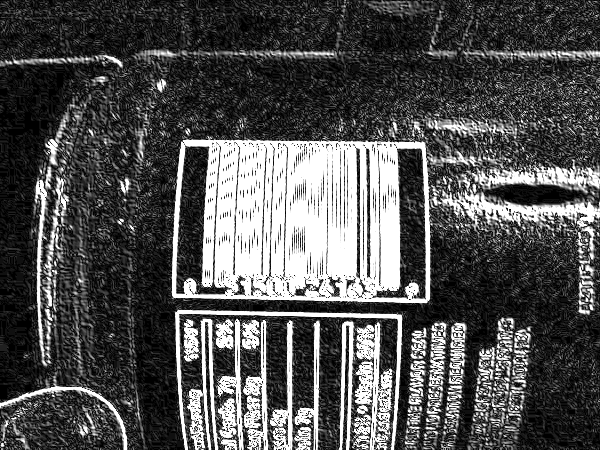

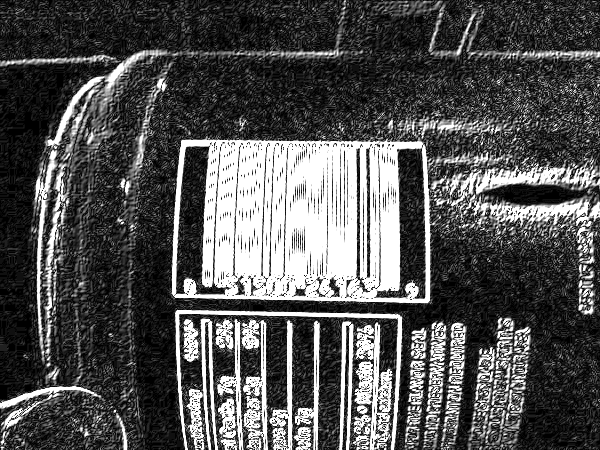

In [12]:
#Sobel Gradient
ddepth = cv2.CV_32F
gradX = cv2.Sobel(gray,ddepth=ddepth, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray,ddepth=ddepth, dx=0, dy=1, ksize=-1)
cv2_imshow(gradX)
cv2_imshow(gradY)

#Subract
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)
cv2_imshow(gradient)

#Test adding grads
grad = cv2.add(gradX, gradY)
grad = cv2.convertScaleAbs(grad)
cv2_imshow(grad)

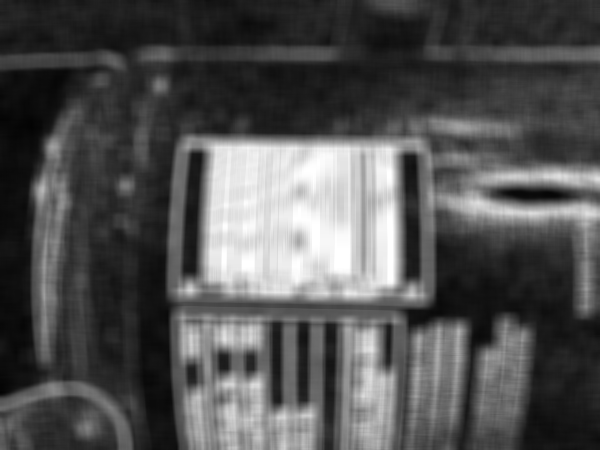

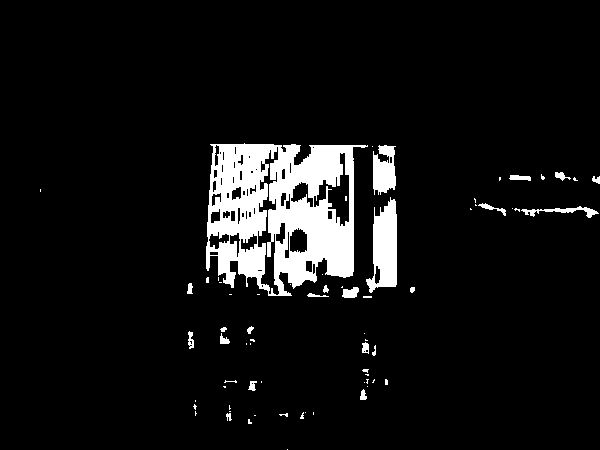

In [24]:
#Blur : Low pass filter
blurred = cv2.blur(gradient, (15,15))
cv2_imshow(blurred)

#Thresholding
(_, thres) = cv2.threshold(bluerred, thresh=220, maxval=255, type=cv2.THRESH_BINARY)
cv2_imshow(thres)

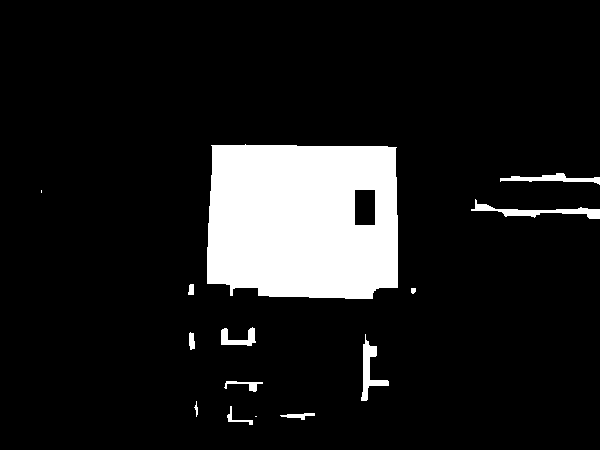

In [29]:
#morphologyEx(...,cv2.MORPH_CLOSE,..) : Closing : dilation followed by erosion
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,20))
closed = cv2.morphologyEx(thres, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed)

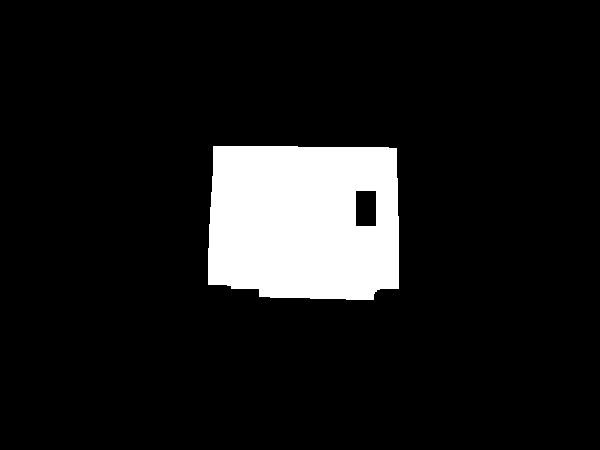

In [50]:
#morphologyEx(...,cv2.MORPH_OPEN,..) : Opening : erosion followed by dilation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,20))
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)
cv2_imshow(opened)

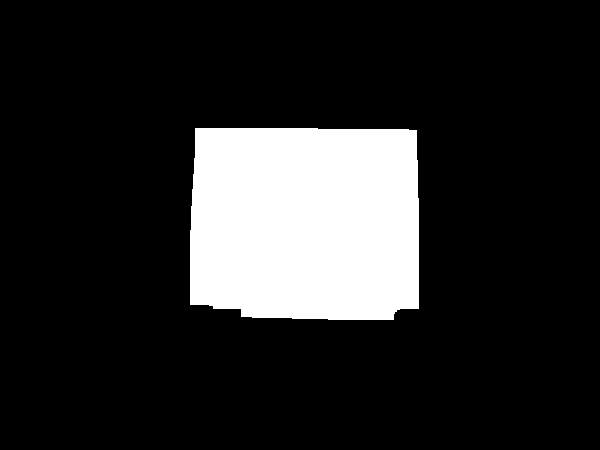

In [54]:
#Dilate last time to have tolerance band
dilated = cv2.dilate(opened, kernel, iterations=2)
cv2_imshow(dilated)

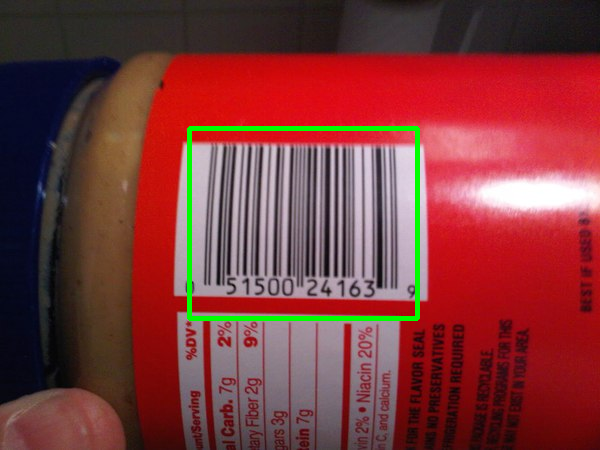

In [58]:
#Find contours
cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]  #Returns contour of largest blob

#Compute minimum bbox
rect = cv2.minAreaRect(c)
#Get corner points
box = cv2.boxPoints(rect).astype(numpy.int)

#Draw Bbox
cv2.drawContours(image, [box], -1, (0,255,0), 3)
cv2_imshow(image)

#Function

In [93]:
def detect_barcode(img_path):
    image = cv2.imread(img_path)
    cv2_imshow(image)

    #convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #Sobel Gradient
    ddepth = cv2.CV_32F
    gradX = cv2.Sobel(gray,ddepth=ddepth, dx=1, dy=0, ksize=-1)
    gradY = cv2.Sobel(gray,ddepth=ddepth, dx=0, dy=1, ksize=-1)

    #Subract
    gradient = cv2.subtract(gradX, gradY)
    gradient = cv2.convertScaleAbs(gradient)

    #Test adding grads
    grad = cv2.add(gradX, gradY)
    grad = cv2.convertScaleAbs(grad)

    #Blur : Low pass filter
    blurred = cv2.blur(gradient, (15,15))
    cv2_imshow(blurred)

    #Thresholding
    (_, thres) = cv2.threshold(blurred, thresh=200, maxval=255, type=cv2.THRESH_BINARY)
    cv2_imshow(thres)

    #morphologyEx(...,cv2.MORPH_CLOSE,..) : Closing : dilation followed by erosion
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,20))
    closed = cv2.morphologyEx(thres, cv2.MORPH_CLOSE, kernel)

    #morphologyEx(...,cv2.MORPH_OPEN,..) : Opening : erosion followed by dilation
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,20))
    opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)
    cv2_imshow(opened)

    #Dilate last time to have tolerance band
    dilated = cv2.dilate(opened, kernel, iterations=2)
    cv2_imshow(dilated)

    #Find contours
    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]  #Returns contour of largest blob

    #Compute minimum bbox
    rect = cv2.minAreaRect(c)
    #Get corner points
    box = cv2.boxPoints(rect).astype(numpy.int)

    #Draw Bbox
    cv2.drawContours(image, [box], -1, (0,255,0), 3)
    cv2_imshow(image)

#Tests

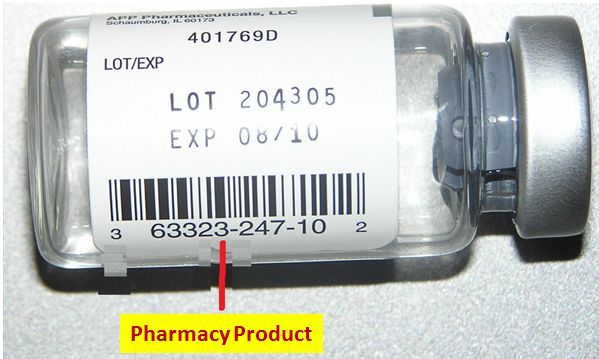

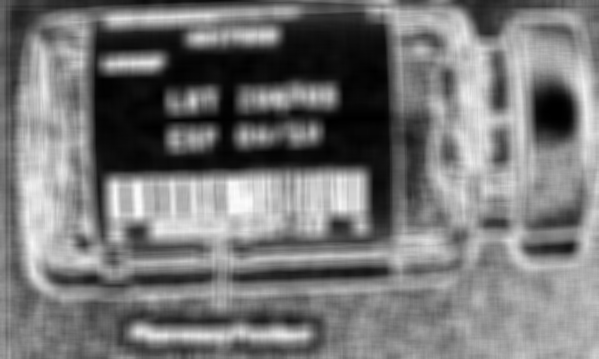

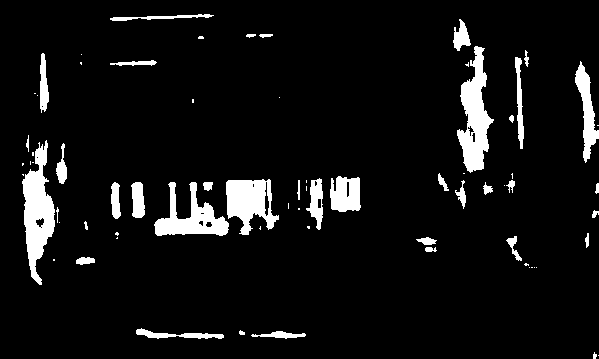

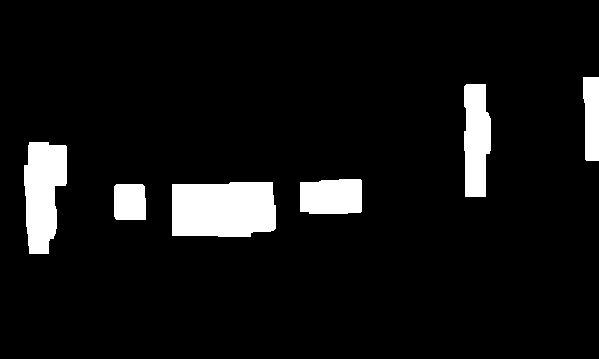

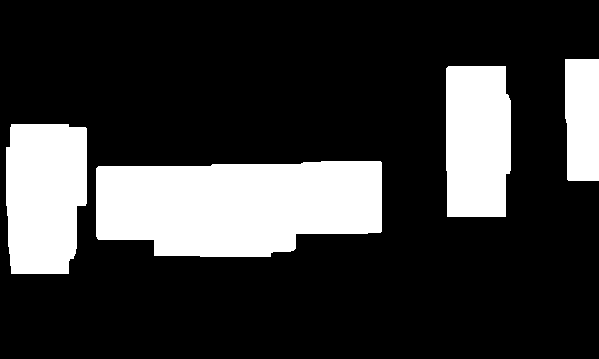

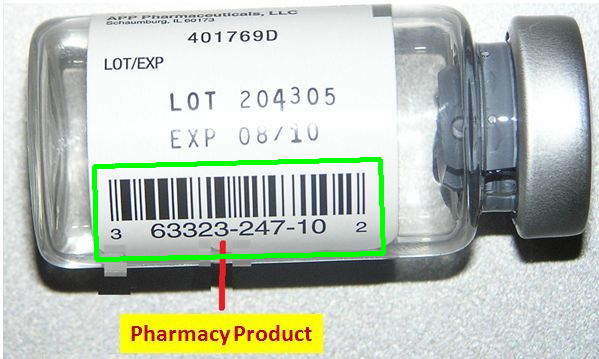

In [94]:
test_image_path = '/content/barcode_03.jpeg'
detect_barcode(test_image_path)

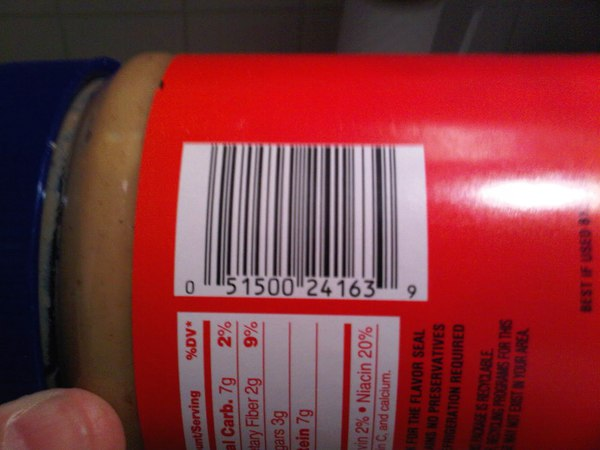

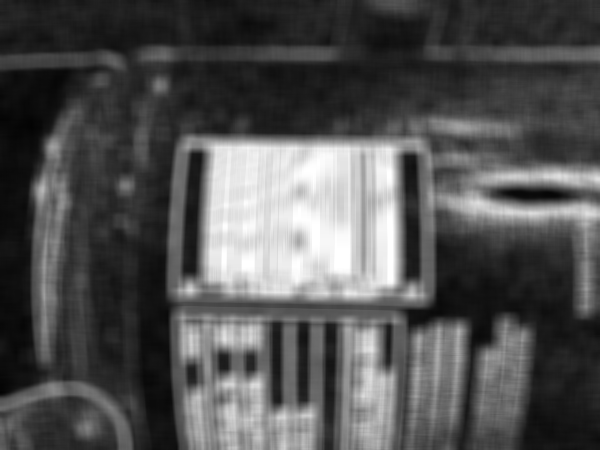

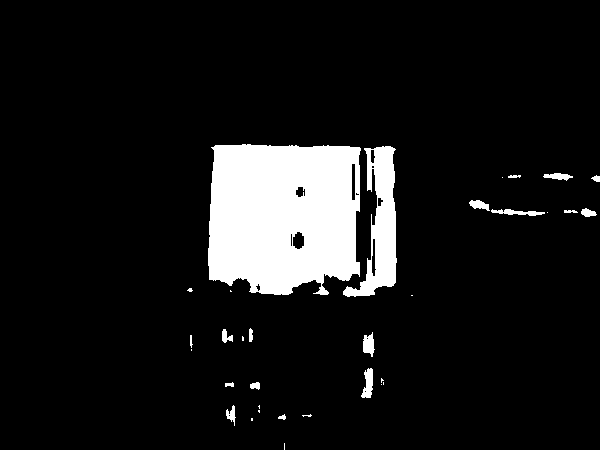

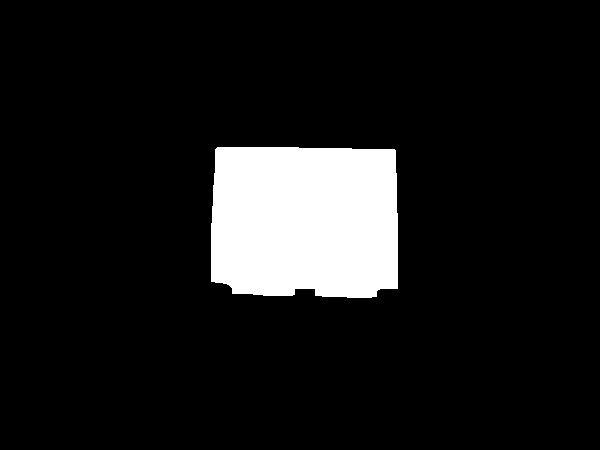

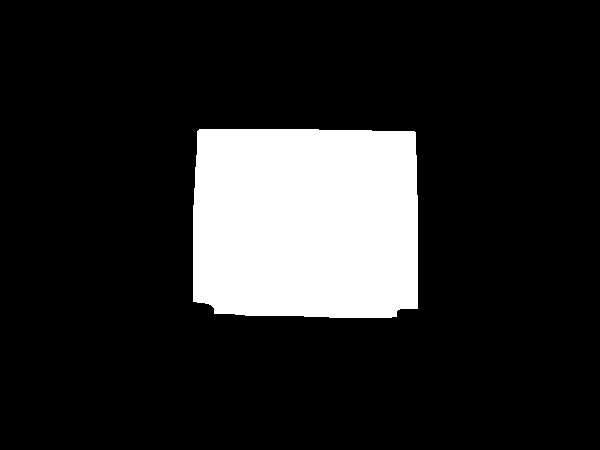

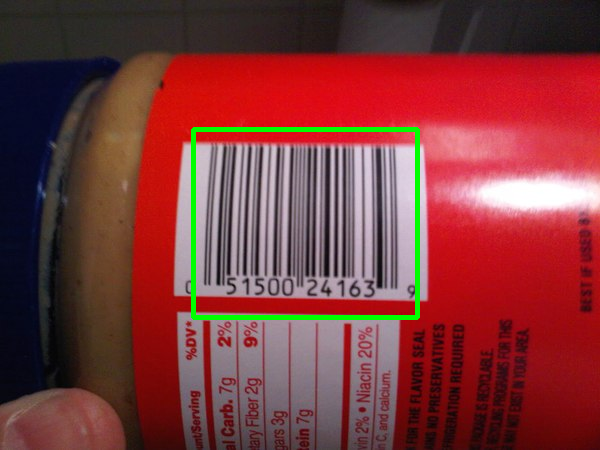

In [95]:
test_image_path = '/content/barcode_01.jpeg'
detect_barcode(test_image_path)